In [1]:
# !pip install numpy pandas mlxtend scikit-learn
# !pip install matplotlib seaborn

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

df_train = pd.read_csv("./Dataset/Train_data.csv")
df_test = pd.read_csv('./Dataset/Test_data.csv')

## Data Preprocessing

In [3]:
pd.set_option("display.max_columns",41)
df_train.head(n=5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,...,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
pd.set_option("display.max_columns", 120)  # Set display option to show a maximum of 120 columns
data_train = pd.get_dummies(df_train, columns=["protocol_type", "flag", "service", "class"])  # Convert categorical variables into dummy variables
data_train.head()  # Display the first few rows of the transformed training data


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,class_anomaly,class_normal
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Initialize the StandardScaler

# Select columns with numeric data types (float64 and int64)
cols = data_train.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler on the numeric columns and transform the data
sc_train = scaler.fit_transform(data_train.select_dtypes(include=['float64', 'int64']))

# Create a DataFrame from the scaled data with appropriate column names
sc_traindf = pd.DataFrame(sc_train, columns=cols)

sc_train  # Output the scaled training data


array([[-0.11355066, -0.00988885, -0.03930979, ..., -0.62736475,
        -0.22166806, -0.37428075],
       [-0.11355066, -0.01003196, -0.03930979, ..., -0.62736475,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       ...,
       [-0.11355066, -0.01009252, -0.03930979, ..., -0.62736475,
         2.88429591,  2.77704096],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075]])

In [6]:
sc_traindf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.720244,-0.354628,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.624317,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,-1.320567,0.490836,-0.373886,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,0.334947,-0.299430,1.595477,1.600209,-0.372186,-0.373098,-1.388806,0.042773,-0.373886,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.694082,-0.313230,-0.193018,-0.187141,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.476067,0.059355,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.023115,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,0.134374,-0.285631,-0.640142,-0.633978,2.765176,2.729322,-1.343313,0.042773,-0.373886,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,-0.728964,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,0.177977,-0.285631,-0.640142,-0.633978,2.765176,2.729322,-1.343313,0.042773,-0.373886,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,0.0,-0.09599,0.387271,-0.133837,1.595477,1.600209,-0.372186,-0.373098,-1.184088,-0.013235,-0.373886,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374

In [7]:
def encode_units(x):
    # Encode the input x: 0 for non-positive values, 1 for positive values
    if x <= 0:
        return 0
    if x >= 0:
        return 1

# Apply the encoding function to each element in the DataFrame
train_df = sc_traindf.map(encode_units)

# Display the first 10 rows of the encoded DataFrame
train_df.head(n=10)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [8]:
columns = data_train.columns
colname = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']
for col in columns :
    for j in colname :
        if col == j :
            data_train[col] = train_df[col]
data_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,class_anomaly,class_normal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0,0,0,

In [9]:
data_train[['num_outbound_cmds','is_host_login']].head()
for col in data_train.columns :
    if data_train[col].mean() == 0 :
        print(col)

num_outbound_cmds
is_host_login


In [10]:
# Drop specified columns from the training DataFrame
data_train.drop(["num_outbound_cmds", "is_host_login"], axis=1, inplace=True)

# Output the modified training DataFrame
data_train


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,class_anomaly,class_normal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,

## Rules Creation

In [11]:
# Generate frequent itemsets using the Apriori algorithm with specified parameters
frequent_itemsets = apriori(data_train, min_support=0.08, use_colnames=True, max_len=2)

# Sort the resulting frequent itemsets by support in descending order
result = frequent_itemsets.sort_values(['support'], ascending=[False])


/Volumes/Vivek Drive/Project/Open_Source/ML-Nexus/.venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
# Generate association rules from the frequent itemsets using the confidence metric
rules = association_rules(result, metric="confidence", min_threshold=0.85)

# Sort the rules by confidence and lift in descending order
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Output the sorted association rules
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
83,(protocol_type_udp),(flag_SF),0.119522,0.594355,0.119522,1.000000,1.682495,0.048483,inf,0.460710
12,(logged_in),(protocol_type_tcp),0.394768,0.814782,0.394768,1.000000,1.227321,0.073118,inf,0.306027
19,(service_http),(protocol_type_tcp),0.317680,0.814782,0.317680,1.000000,1.227321,0.058840,inf,0.271453
26,(srv_serror_rate),(protocol_type_tcp),0.286440,0.814782,0.286440,1.000000,1.227321,0.053054,inf,0.259568
31,(dst_host_srv_serror_rate),(protocol_type_tcp),0.281478,0.814782,0.281478,1.000000,1.227321,0.052135,inf,0.257776
...,...,...,...,...,...,...,...,...,...,...
17,(logged_in),(dst_host_same_srv_rate),0.394768,0.498730,0.337051,0.853796,1.711941,0.140169,3.428564,0.687121
71,(diff_srv_rate),(class_anomaly),0.171285,0.466140,0.146197,0.853534,1.831068,0.066355,3.644946,0.547680
92,(protocol_type_udp),(same_srv_rate),0.119522,0.622102,0.101818,0.851876,1.369351,0.027463,2.551233,0.306342
89,(dst_host_rerror_rate),(rerror_rate),0.138060,0.124127,0.117537,0.851351,6.858728,0.100400,5.892239,0.991020


In [13]:
for i in range(rules.shape[0]):
    
    print("Rule: " + list(rules.iloc[i,0])[0] + " -> " + list(rules.iloc[i,1])[0])

    # second index of the inner list
    print("Support: " + str(rules.iloc[i,4]))

    # third index of the list located at 0th
    # of the third index of the inner list
    print("Confidence: " + str(rules.iloc[i,5]))
    print("Lift: " + str(rules.iloc[i,6]))
    print("=====================================")

Rule: protocol_type_udp -> flag_SF
Support: 0.11952207049857097
Confidence: 1.0
Lift: 1.6824951579509784
Rule: logged_in -> protocol_type_tcp
Support: 0.3947681803747221
Confidence: 1.0
Lift: 1.2273214459709638
Rule: service_http -> protocol_type_tcp
Support: 0.31768021594156876
Confidence: 1.0
Lift: 1.2273214459709638
Rule: srv_serror_rate -> protocol_type_tcp
Support: 0.2864401397268974
Confidence: 1.0
Lift: 1.2273214459709638
Rule: dst_host_srv_serror_rate -> protocol_type_tcp
Support: 0.28147824706255953
Confidence: 1.0
Lift: 1.2273214459709638
Rule: flag_S0 -> protocol_type_tcp
Support: 0.2782232454747539
Confidence: 1.0
Lift: 1.2273214459709638
Rule: dst_host_srv_rerror_rate -> protocol_type_tcp
Support: 0.12519847570657353
Confidence: 1.0
Lift: 1.2273214459709638
Rule: srv_rerror_rate -> protocol_type_tcp
Support: 0.1249603048586853
Confidence: 1.0
Lift: 1.2273214459709638
Rule: dst_bytes -> protocol_type_tcp
Support: 0.09820577961257541
Confidence: 1.0
Lift: 1.2273214459709638


## Rules Analysis

In [14]:
# Assuming `data_test` is your test dataframe

# Step 1: Standardizing the same columns as training
cols = df_test.select_dtypes(include=['float64', 'int64']).columns
sc_test = scaler.transform(df_test.select_dtypes(include=['float64', 'int64']))

sc_testdf = pd.DataFrame(sc_test, columns=cols)




for col in df_test.columns:
    if col in colname:
        sc_testdf[col] = sc_testdf[col].map(encode_units)

# Step 4: Dropping the same columns as in training
sc_testdf.drop(["num_outbound_cmds", "is_host_login"], axis=1, inplace=True)

# Step 5: Displaying the processed test data
sc_testdf.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,1


In [23]:
sc_testdf.shape

(22544, 36)

In [24]:
def test_apriori_rules(rules, test_df):
    true_positive = 0
    false_positive = 0
    false_negative = 0  # Initialize false negatives counter

    for index, row in test_df.iterrows():
        for _, rule in rules.iterrows():
            antecedents = rule['antecedents']
            consequents = rule['consequents']
            
            # Check if antecedents match in the test transaction
            antecedent_matches = all(item in row[row == True].index for item in antecedents)
            
            if antecedent_matches:
                # Check if consequents match in the test transaction
                consequent_matches = all(item in row[row == True].index for item in consequents)
                
                if consequent_matches:
                    true_positive += 1
                else:
                    false_positive += 1
                
                # If antecedent matches but consequent does not
                if not consequent_matches:
                    false_negative += 1  # Consequent should be there but isn't

    # Compute precision and recall
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

    # Print the results
    print(f"True Positives: {true_positive}")
    print(f"False Positives: {false_positive}")
    print(f"False Negatives: {false_negative}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

# Test the rules on the test data
test_apriori_rules(rules, sc_testdf)


True Positives: 201025
False Positives: 44128
False Negatives: 53437
Precision: 0.8200
Recall: 0.7900


/var/folders/kj/8ccbfhn56tgcwgc45d118plh0000gn/T/ipykernel_86984/3958810371.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)  # 'tab10' provides 10 distinct colors


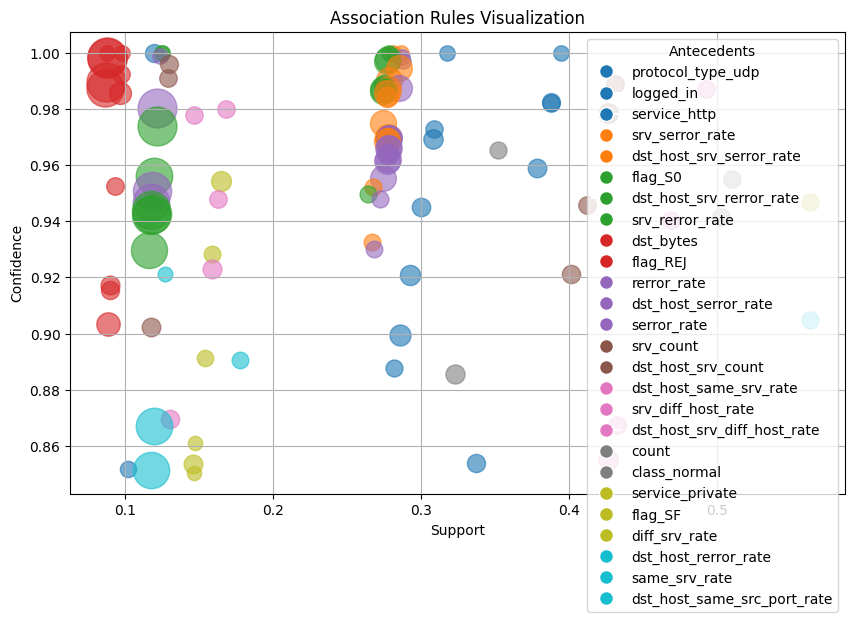

In [16]:

# Convert frozensets to strings for plotting
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0])  # Convert frozenset to str
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0])

# Create a unique color for each class in 'antecedents'
unique_classes = rules['antecedents'].unique()
num_classes = len(unique_classes)

# Create a color map using the 'tab10' colormap for distinct colors
colors = plt.cm.get_cmap('tab10', num_classes)

# Create a mapping from each unique class to its corresponding color
class_color_map = {cls: colors(i) for i, cls in enumerate(unique_classes)}

# Create a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
for idx, row in rules.iterrows():
    plt.scatter(row['support'], row['confidence'], s=row['lift'] * 100,
                color=class_color_map[row['antecedents']], alpha=0.6, label=row['antecedents'])

# Create a legend to show the color mapping for antecedents
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                       markerfacecolor=class_color_map[cls], markersize=10) for cls in unique_classes]
plt.legend(title='Antecedents', handles=handles)

# Add labels and title to the plot
plt.title('Association Rules Visualization')
plt.xlabel('Support')
plt.ylabel('Confidence')

plt.grid()
plt.show()  # Display the scatter plot


In [17]:
# Filter the rules DataFrame to find rules where the consequent is 'class_anomaly'
rules[rules['consequents'] == {'class_anomaly'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [18]:
# Generate association rules from the frequent itemsets using the confidence metric with a higher threshold
rules = association_rules(result, metric="confidence", min_threshold=0.95)

# Sort the rules by confidence and lift in descending order
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Output the sorted association rules
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
54,(protocol_type_udp),(flag_SF),0.119522,0.594355,0.119522,1.000000,1.682495,0.048483,inf,0.460710
4,(logged_in),(protocol_type_tcp),0.394768,0.814782,0.394768,1.000000,1.227321,0.073118,inf,0.306027
9,(service_http),(protocol_type_tcp),0.317680,0.814782,0.317680,1.000000,1.227321,0.058840,inf,0.271453
14,(srv_serror_rate),(protocol_type_tcp),0.286440,0.814782,0.286440,1.000000,1.227321,0.053054,inf,0.259568
17,(dst_host_srv_serror_rate),(protocol_type_tcp),0.281478,0.814782,0.281478,1.000000,1.227321,0.052135,inf,0.257776
...,...,...,...,...,...,...,...,...,...,...
0,(class_normal),(same_srv_rate),0.533860,0.622102,0.509963,0.955238,1.535500,0.177848,8.442437,0.748158
44,(service_private),(class_anomaly),0.172714,0.466140,0.164814,0.954263,2.047160,0.084306,11.672486,0.618309
59,(dst_bytes),(flag_SF),0.098206,0.594355,0.093561,0.952708,1.602927,0.035192,8.577477,0.417103
42,(dst_host_srv_serror_rate),(dst_host_count),0.281478,0.643022,0.267982,0.952052,1.480591,0.086985,7.445100,0.451752


In [19]:
rules[rules['consequents'] == {'class_anomaly'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
37,(flag_S0),(class_anomaly),0.278223,0.46614,0.275048,0.988586,2.120792,0.145357,46.772805,0.732190
36,(dst_host_srv_serror_rate),(class_anomaly),0.281478,0.46614,0.277072,0.984346,2.111697,0.145864,34.104513,0.732681
28,(srv_serror_rate),(class_anomaly),0.286440,0.46614,0.277707,0.969512,2.079873,0.144186,17.510607,0.727621
35,(dst_host_serror_rate),(class_anomaly),0.287512,0.46614,0.277191,0.964103,2.068270,0.143170,14.872106,0.724930
23,(serror_rate),(class_anomaly),0.288544,0.46614,0.278184,0.964094,2.068250,0.143682,14.868307,0.725975
44,(service_private),(class_anomaly),0.172714,0.46614,0.164814,0.954263,2.047160,0.084306,11.672486,0.618309


In [20]:
# Create a filter for rows where 'flag_S0' is 1 and 'class_anomaly' is 1
filt = ((data_train["flag_S0"] == 1) & (data_train["class_anomaly"] == 1))

# Display information about the filtered DataFrame
data_train[filt].info()


<class 'pandas.core.frame.DataFrame'>
Index: 6929 entries, 2 to 25191
Columns: 118 entries, duration to class_normal
dtypes: bool(82), int64(36)
memory usage: 2.5 MB


In [21]:
# Create a filter for rows where 'flag_S0' is 1 and 'class_anomaly' is 0
filt = ((data_train["flag_S0"] == 1) & (data_train["class_anomaly"] == 0))

# Display information about the filtered DataFrame
data_train[filt].info()


<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 306 to 24649
Columns: 118 entries, duration to class_normal
dtypes: bool(82), int64(36)
memory usage: 29.5 KB
